# Вариант 8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, vonmises, ks_2samp
from statsmodels.stats.diagnostic import lilliefors
from collections import Counter

### 1. 
Пусть $x_1, \dots , x_n$ — выборка из распределения $P$.  
Хотим проверить гипотезу $H_0: P \in \{N(\alpha, \sigma^2)\}$.   
a) Можно ли использовать критерий $\omega^2$ для проверки принадлежности выборки к семейству нормальных?  
Подтвердите свой ответ с помощью моделирования.  
b) Подойдет ли критерий Лиллиефорса для проверки принадлежности к семейству нормальных?  
Продемонстрируйте это.


### a) Критерий $\omega^2$
$$
S_{\omega}=n \omega_{n}^{2}=\frac{1}{12 n}+\sum_{i=1}^{n}\left(F\left(x_{i}, \theta\right)-\frac{2 i-1}{2 n}\right)^{2}
$$  
Для уровня доверия 95% будем использовать квантили из таблицы:

|$\alpha$ | 0.01 |	0.05 |	0.1 |
|--|--|--|--|
|$n \omega^2(\alpha) $|	0.179 |	0.126 |	0.104 |

Для начала проверим работу критерия при верной 
$H_0: X_i \sim Norm(a, \sigma^2)$

In [2]:
def omega_squared(sample):
    m = sample.mean()
    s = sample.std()
    n = len(sample)
    x = np.sort(sample)
    return 1 / (12 * n) + np.sum((norm.cdf(x, m, s) - np.arange(1, 2 * n + 1, 2) / 2 / n) ** 2)
    
def omega_squared_test(sample):
    n = len(sample)
    assert n > 40, 'Quantiles used are valid for sample size n > 40'
    S_w = omega_squared(sample)
    return S_w > 0.126

Вероятность ошибки первого рода:  0.049275362318840575


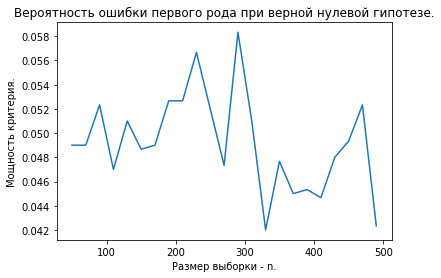

In [3]:
total_error = []
for n in range(50, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.normal(a, b, n)
        res.append(omega_squared_test(x))
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Вероятность ошибки первого рода: ', np.mean(total_error))
ax = sns.lineplot(np.arange(50, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Вероятность ошибки первого рода при верной нулевой гипотезе.')
plt.show()

#### Теперь проверим мощность критерия, если случайные величины имеют распределение, отлично от нормального.
Равномерное. $X_i \sim Uniform(a, b)$

Мощность критерия в среднем:  0.9469275362318841


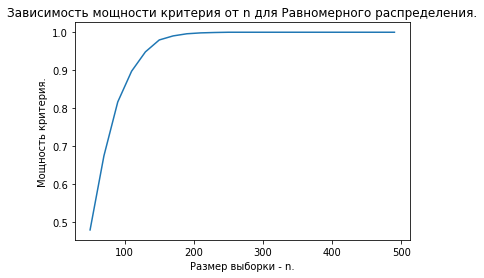

In [4]:
total_error = []
for n in range(50, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.uniform(a, a + b, n)
        res.append(omega_squared_test(x))
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(50, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для Равномерного распределения.')
plt.show()

Лапласа. $X_i \sim Laplace(a, b)$

Мощность критерия в среднем:  0.9361884057971015


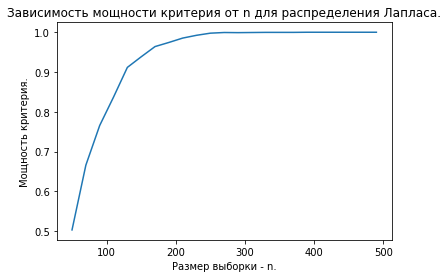

In [5]:
total_error = []
for n in range(50, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.laplace(a, b, n)
        res.append(omega_squared_test(x))
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(50, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для распределения Лапласа.')
plt.show()

Пуассона. $X_i \sim Poisson(a)$

Мощность критерия в среднем:  0.9687391304347825


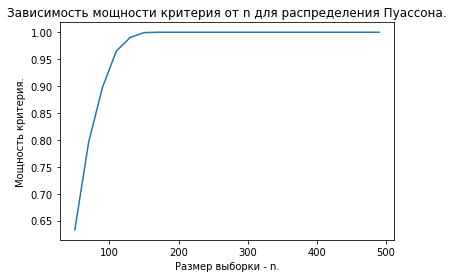

In [6]:
total_error = []
for n in range(50, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        x = np.random.poisson(a, n)
        res.append(omega_squared_test(x))
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(50, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для распределения Пуассона.')
plt.show()

### b) Критерий Лиллиефорса
Для начала проверим работу критерия при верной 
$H_0: X_i \sim Norm(a, \sigma^2)$

Вероятность ошибки первого рода:  0.050199999999999995


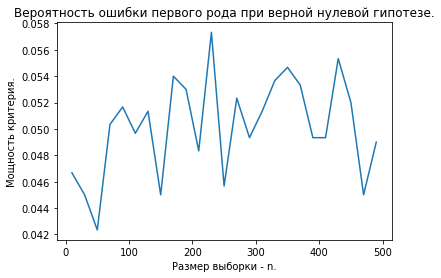

In [7]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.normal(a, b, n)
        st, p_val = lilliefors(x)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Вероятность ошибки первого рода: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Вероятность ошибки первого рода при верной нулевой гипотезе.')
plt.show()

#### Теперь проверим мощность критерия, если случайные величины имеют распределение, отлично от нормального.
Равномерное. $X_i \sim Uniform(a, b)$

Мощность критерия в среднем:  0.8141066666666665


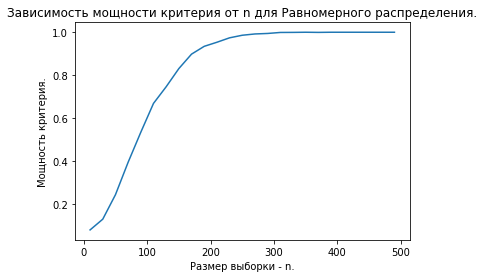

In [8]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.uniform(a, a + b, n)
        st, p_val = lilliefors(x)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для Равномерного распределения.')
plt.show()

Лапласа. $X_i \sim Laplace(a, b)$

Мощность критерия в среднем:  0.84772


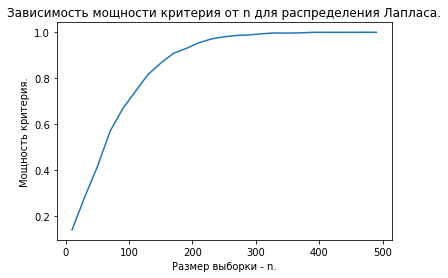

In [9]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.laplace(a, b, n)
        st, p_val = lilliefors(x)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для распределения Лапласа.')
plt.show()

Пуассона. $X_i \sim Poisson(a)$

Мощность критерия в среднем:  0.9285733333333335


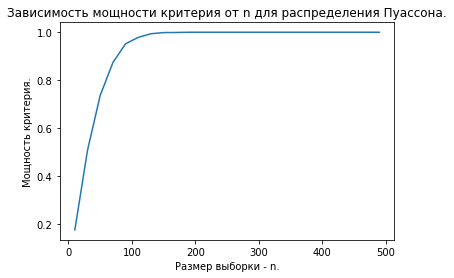

In [10]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        x = np.random.poisson(a, n)
        st, p_val = lilliefors(x)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n для распределения Пуассона.')
plt.show()

### Вывод: оба критерия являются состоятельными при проверке нормальности.

### 2. Данные Blood Transfusion Service Center.
R (Recency - months since last donation),   
F (Frequency - total number of donation),   
M (Monetary - total blood donated in c.c.),   
T (Time - months since first donation), and  
a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

In [11]:
df = pd.read_csv('data/transfusion.data', header=0, names=['Recency', 'Frequency', 'Monetary', 'Time', 'M07'])

In [12]:
print(df.head())

   Recency  Frequency  Monetary  Time  M07
0        2         50     12500    98    1
1        0         13      3250    28    1
2        1         16      4000    35    1
3        2         20      5000    45    1
4        1         24      6000    77    0


In [13]:
df.describe()

,Recency,Frequency,Monetary,Time,M07
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


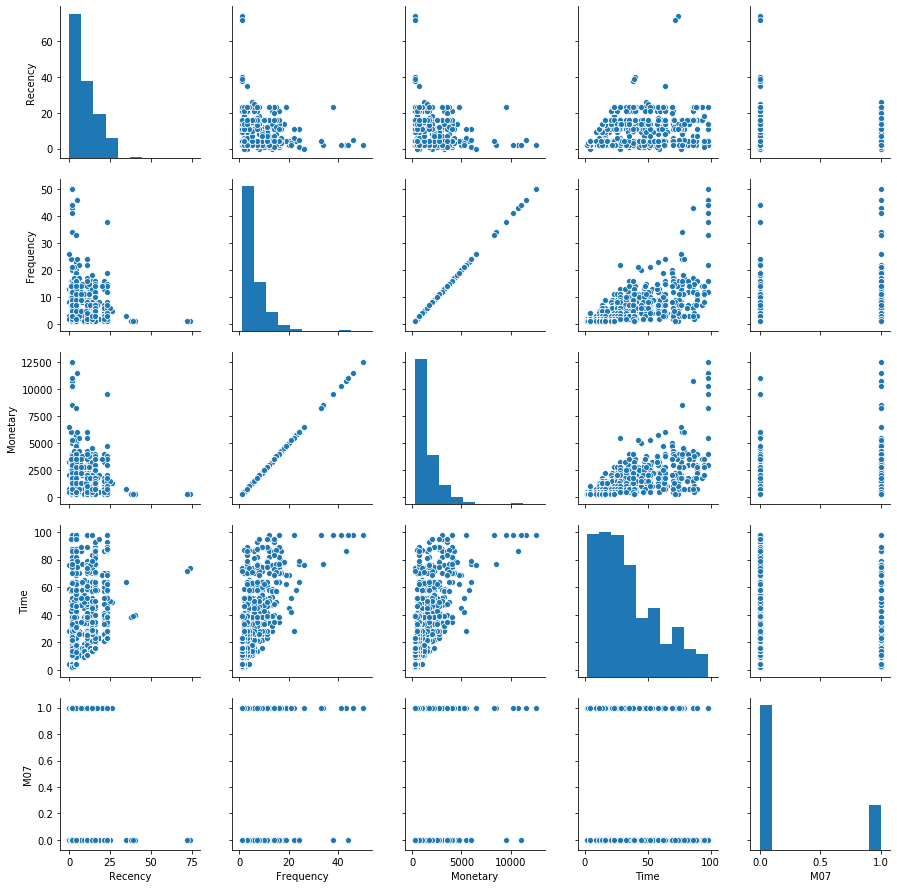

In [14]:
sns.pairplot(df)

Рассмотрим две группы людей - тех, кто сдавал кровь в марте 2007, и тех, кто не сдавал.  
И проверим, одинаково ли распределно время первой сдачи крови при помощи двухвыборочного критерия Колмогорова—Смирнова.

In [15]:
df_pos = df[df['M07'] == 1]
df_neg = df[df['M07'] == 0]

Посмотрим на плотность распределения.

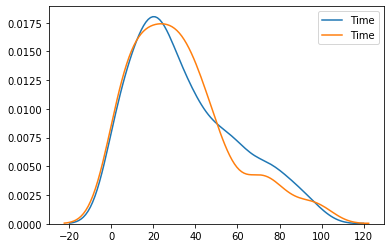

In [16]:
feature = 'Time'
sns.kdeplot(df_neg[feature])
sns.kdeplot(df_pos[feature])

Проведем тест Колмогорова—Смирнова.  
$X_i \sim F; Y_i \sim G$  
$H_0: \{F = G\}; H_1: H_0$ неверна. 

In [17]:
statistc, p_val = ks_2samp(df_neg[feature], df_pos[feature])
print(p_val)

0.31631119459002077


Так как p-value > 0.05, то у нас нет причины отклонять $H_0$.

#### Проверим работу двухвыборочного критерия Колмогорова—Смирнова.
Для нормального распределения

Мощность критерия в среднем:  0.04364


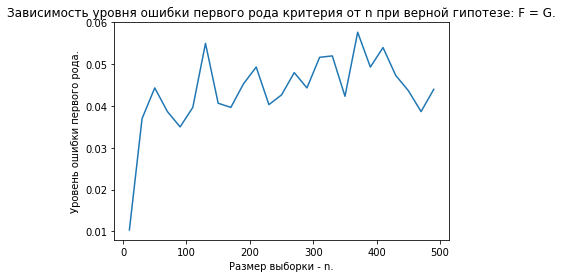

In [18]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.normal(a, b, n)
        y = np.random.normal(a, b, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Уровень ошибки первого рода.', 
       title='Зависимость уровня ошибки первого рода критерия от n при верной гипотезе: F = G.')
plt.show()

Мощность критерия в среднем:  0.8628666666666667


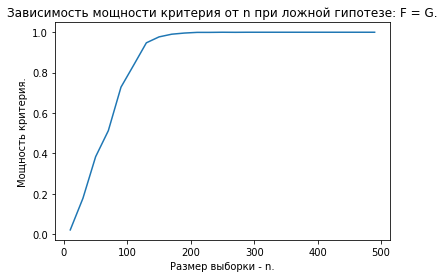

In [19]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.normal(a, b, n)
        y = np.random.normal(a, b / 2, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.',  ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n при ложной гипотезе: F = G.')
plt.show()

Для распределения лапласа.

Мощность критерия в среднем:  0.04263999999999999


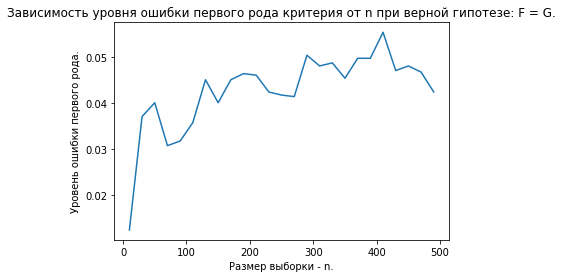

In [20]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.laplace(a, b, n)
        y = np.random.laplace(a, b, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Уровень ошибки первого рода.', 
       title='Зависимость уровня ошибки первого рода критерия от n при верной гипотезе: F = G.')
plt.show()

Мощность критерия в среднем:  0.7865466666666667


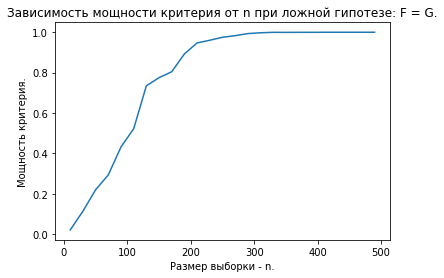

In [21]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.laplace(a, b, n)
        y = np.random.laplace(a,  2 * b, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.',  ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n при ложной гипотезе: F = G.')
plt.show()

Для равномерного.

Мощность критерия в среднем:  0.97048


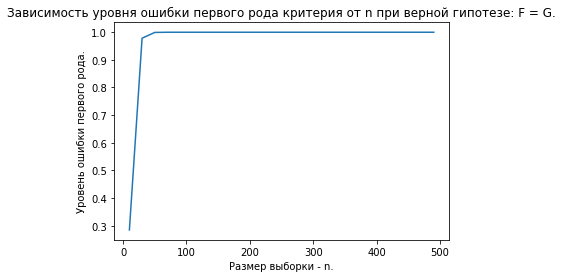

In [22]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.uniform(a, a + b, n)
        y = np.random.uniform(a, a + 2 * b, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.', ylabel='Уровень ошибки первого рода.', 
       title='Зависимость уровня ошибки первого рода критерия от n при верной гипотезе: F = G.')
plt.show()

Мощность критерия в среднем:  0.97104


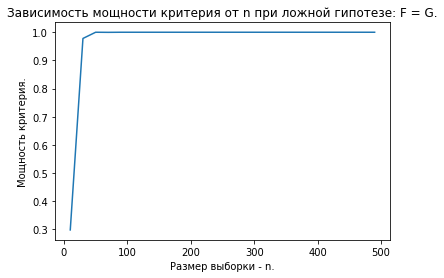

In [23]:
total_error = []
for n in range(10, 500, 20):
    res = []
    for i in range(3000):
        a = np.random.uniform(10)
        b = np.random.uniform(10)
        x = np.random.uniform(a, a + b, n)
        y = np.random.uniform(a, a + 2 * b, n)
        statistc, p_val = ks_2samp(x, y)
        res.append(p_val < 0.05)
    c = Counter(res)
    total_error.append(c[True] / 3000)
print('Мощность критерия в среднем: ', np.mean(total_error))
ax = sns.lineplot(np.arange(10, 500, 20), total_error)
ax.set(xlabel='Размер выборки - n.',  ylabel='Мощность критерия.', 
       title='Зависимость мощности критерия от n при ложной гипотезе: F = G.')
plt.show()